In [2]:
import numpy as np    
import uproot3
import matplotlib.pyplot as plt

In [3]:
infile_1l = 'data/largedrum_1L_dense_MedianCut_3cmVoxel_withoutCut.discriminator.root'

In [4]:
infile_21l = 'data/largedrum_21L_dense_MedianCut_3cmVoxel_all.discriminator.root'

In [5]:
infile_bitumen = 'data/largedrum_onlybitumen_dense_newmetrics_3cmVoxel_April2021.discriminator.root'

In [6]:
infile_hydrogen = 'data/largedrum_onlyhydrogen_dense_newmetrics_3cmVoxel_April2021.discriminator.root'

In [7]:
fu = uproot3.open(infile_1l)
histogram_1l = fu['histMedianMetric'].numpy()[0]
bins_x, bins_y, bins_z = fu['histMedianMetric;1'].numpy()[1][0]
shape_x, shape_y, shape_z = histogram_1l.shape

In [8]:
fu = uproot3.open(infile_21l)
histogram_21l = fu['histMedianMetric'].numpy()[0]
bins_x, bins_y, bins_z = fu['histMedianMetric;1'].numpy()[1][0]
shape_x, shape_y, shape_z = histogram_21l.shape

In [9]:
fu = uproot3.open(infile_bitumen)
histogram_bitumen = fu['histMedianMetric'].numpy()[0]
bins_x, bins_y, bins_z = fu['histMedianMetric;1'].numpy()[1][0]
shape_x, shape_y, shape_z = histogram_bitumen.shape

In [10]:
fu = uproot3.open(infile_bitumen)
histogram_hydrogen = fu['histMedianMetric'].numpy()[0]
bins_x, bins_y, bins_z = fu['histMedianMetric;1'].numpy()[1][0]
shape_x, shape_y, shape_z = histogram_hydrogen.shape

In [11]:
def cube(x, y, z):
    if x in [0,shape_x-1] or y in [0, shape_y-1] or z in [0, shape_z-1]:
        return None
    mgrid = np.mgrid[x-1:x+2:1, y-1:y+2:1, z-1:z+2:1]
    x, y, z = map(np.ravel, mgrid)
    return x, y, z

In [12]:
def stats_count(histogram, threshold=11.265, centre='above'):
    stats_above = dict()
    stats_below = dict()
    if centre == 'above':
        xx, yy, zz = np.where(histogram>=threshold)
    elif centre == 'below':
        xx, yy, zz = np.where(histogram<threshold)
    for x, y, z in zip(xx, yy, zz):
        cubes_coord = cube(x, y, z)
        if cubes_coord is None:
            continue
        xs, ys, zs = cubes_coord
        triplets = np.array([(i, j, k) for (i, j, k) in zip(xs, ys, zs)])
        cube_around_pt = np.array([histogram[cx, cy, cz] for (cx, cy, cz) in triplets])

        cube_above = cube_around_pt[cube_around_pt >= threshold]
        cube_below = cube_around_pt[cube_around_pt < threshold]
        if centre == 'above':
            above_threshold_count = (len(cube_above) -1) if (len(cube_above) > 0) else 0.
            below_threshold_count = len(cube_below)
        elif centre== 'below':
            above_threshold_count = len(cube_above)
            below_threshold_count = (len(cube_below) -1) if (len(cube_below) > 0) else 0.
        stats_above[(x, y, z)] = above_threshold_count
        stats_below[(x, y, z)] = below_threshold_count
    return stats_above, stats_below

In [13]:
stats_air_air, stats_air_bt = stats_count(histogram_1l)

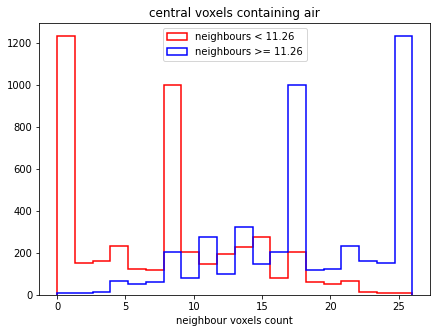

In [14]:
plt.figure(figsize=(7,5))
plot_kwds = {'density': False, 'linewidth':"1.5", 'histtype': u'step', "bins":20}
plt.hist(stats_air_bt.values(), label='neighbours < 11.26', edgecolor='red', **plot_kwds)
plt.hist(stats_air_air.values(), label='neighbours >= 11.26', edgecolor='blue', **plot_kwds)
plt.title("central voxels containing air")
plt.xlabel('neighbour voxels count')
plt.legend(loc='upper center')

#plt.savefig("neighbour_voxels_ct.png") 
plt.show()

In [15]:
stats_air_air, stats_air_bt = stats_count(histogram_21l)

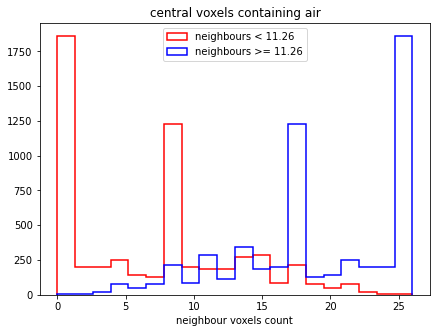

In [16]:
plt.figure(figsize=(7,5))
plot_kwds = {'density': False, 'linewidth':"1.5", 'histtype': u'step', "bins":20}
plt.hist(stats_air_bt.values(), label='neighbours < 11.26', edgecolor='red', **plot_kwds)
plt.hist(stats_air_air.values(), label='neighbours >= 11.26', edgecolor='blue', **plot_kwds)
plt.title("central voxels containing air")
plt.xlabel('neighbour voxels count')
plt.legend(loc='upper center')

#plt.savefig("neighbour_voxels_ct.png") 
plt.show()

In [23]:
stats_air_air, stats_air_bt = stats_count(histogram_bitumen)

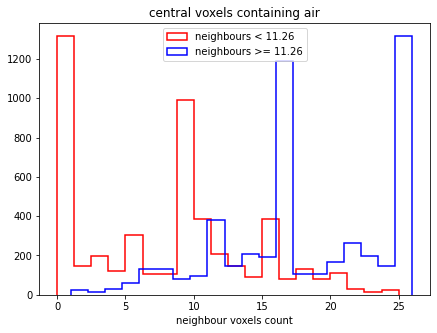

In [24]:
plt.figure(figsize=(7,5))
plot_kwds = {'density': False, 'linewidth':"1.5", 'histtype': u'step', "bins":20}
plt.hist(stats_air_bt.values(), label='neighbours < 11.26', edgecolor='red', **plot_kwds)
plt.hist(stats_air_air.values(), label='neighbours >= 11.26', edgecolor='blue', **plot_kwds)
plt.title("central voxels containing air")
plt.xlabel('neighbour voxels count')
plt.legend(loc='upper center')

#plt.savefig("neighbour_voxels_ct.png") 
plt.show()

In [25]:
stats_air_air, stats_air_bt = stats_count(histogram_hydrogen)

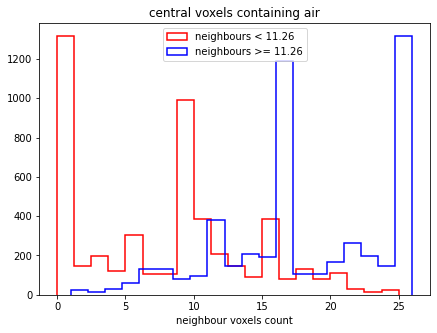

In [26]:
plt.figure(figsize=(7,5))
plot_kwds = {'density': False, 'linewidth':"1.5", 'histtype': u'step', "bins":20}
plt.hist(stats_air_bt.values(), label='neighbours < 11.26', edgecolor='red', **plot_kwds)
plt.hist(stats_air_air.values(), label='neighbours >= 11.26', edgecolor='blue', **plot_kwds)
plt.title("central voxels containing air")
plt.xlabel('neighbour voxels count')
plt.legend(loc='upper center')

#plt.savefig("neighbour_voxels_ct.png") 
plt.show()

In [27]:
stats_bt_air, stats_bt_bt = stats_count(histogram_1l, centre='below')

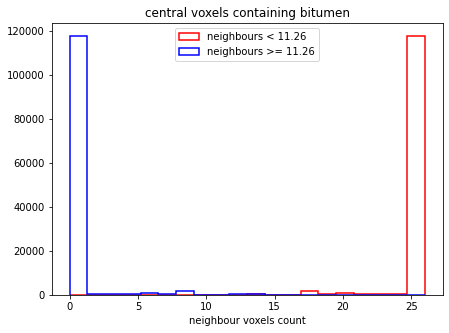

In [28]:
plt.figure(figsize=(7,5))
plot_kwds = {'density': False, 'linewidth':"1.5", 'histtype': u'step', "bins":20}
plt.hist(stats_bt_bt.values(), label='neighbours < 11.26', edgecolor='red', **plot_kwds)
plt.hist(stats_bt_air.values(), label='neighbours >= 11.26', edgecolor='blue', **plot_kwds)
plt.title("central voxels containing bitumen")
plt.xlabel('neighbour voxels count')
plt.legend(loc='upper center')

#plt.savefig("neighbour_voxels_ct.png") 
plt.show()

In [29]:
stats_bt_air, stats_bt_bt = stats_count(histogram_21l, centre='below')

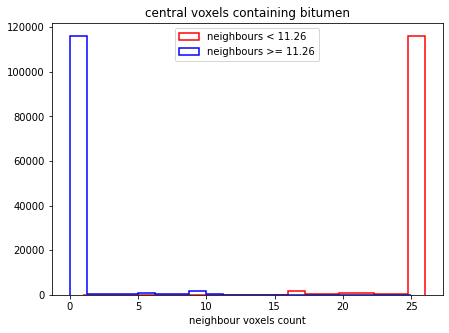

In [30]:
plt.figure(figsize=(7,5))
plot_kwds = {'density': False, 'linewidth':"1.5", 'histtype': u'step', "bins":20}
plt.hist(stats_bt_bt.values(), label='neighbours < 11.26', edgecolor='red', **plot_kwds)
plt.hist(stats_bt_air.values(), label='neighbours >= 11.26', edgecolor='blue', **plot_kwds)
plt.title("central voxels containing bitumen")
plt.xlabel('neighbour voxels count')
plt.legend(loc='upper center')

#plt.savefig("neighbour_voxels_ct.png") 
plt.show()

In [31]:
stats_bt_air, stats_bt_bt = stats_count(histogram_bitumen, centre='below')

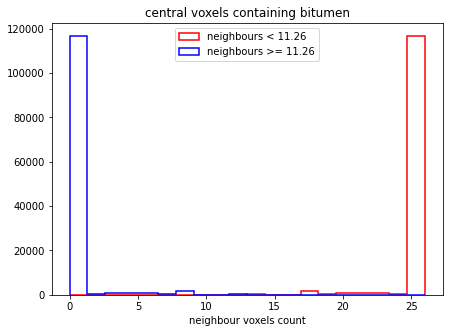

In [32]:
plt.figure(figsize=(7,5))
plot_kwds = {'density': False, 'linewidth':"1.5", 'histtype': u'step', "bins":20}
plt.hist(stats_bt_bt.values(), label='neighbours < 11.26', edgecolor='red', **plot_kwds)
plt.hist(stats_bt_air.values(), label='neighbours >= 11.26', edgecolor='blue', **plot_kwds)
plt.title("central voxels containing bitumen")
plt.xlabel('neighbour voxels count')
plt.legend(loc='upper center')

#plt.savefig("neighbour_voxels_ct.png") 
plt.show()

In [33]:
stats_bt_air, stats_bt_bt = stats_count(histogram_hydrogen, centre='below')

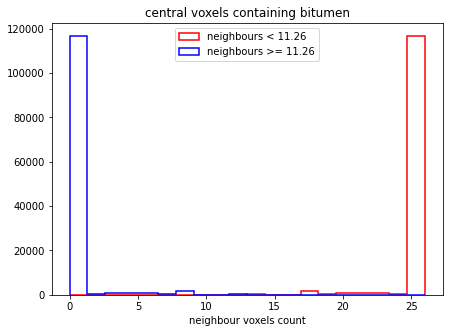

In [34]:
plt.figure(figsize=(7,5))
plot_kwds = {'density': False, 'linewidth':"1.5", 'histtype': u'step', "bins":20}
plt.hist(stats_bt_bt.values(), label='neighbours < 11.26', edgecolor='red', **plot_kwds)
plt.hist(stats_bt_air.values(), label='neighbours >= 11.26', edgecolor='blue', **plot_kwds)
plt.title("central voxels containing bitumen")
plt.xlabel('neighbour voxels count')
plt.legend(loc='upper center')

#plt.savefig("neighbour_voxels_ct.png") 
plt.show()

In [35]:
def select_histogram_coords(histogram, x_min, x_max, y_min, y_max, z_min, z_max):
    sel_x = np.where(np.logical_and(bins_x>=x_min, bins_x<=x_max))[0][:-1]
    sel_y = np.where(np.logical_and(bins_y>=y_min, bins_y<=y_max))[0][:-1]
    sel_z = np.where(np.logical_and(bins_z>=z_min, bins_z<=z_max))[0][:-1]
    sel_hist = np.meshgrid(sel_x,sel_y,sel_z)

    selected_histogram = np.copy(histogram[tuple(sel_hist)])
    return selected_histogram

In [23]:
big_bubble = select_histogram_coords(histogram_21l, -100, 100, -100, 100, -100, 100)

In [24]:
shape_x, shape_y, shape_z = big_bubble.shape

In [25]:
stats_air_air, stats_air_bt = stats_count(big_bubble)

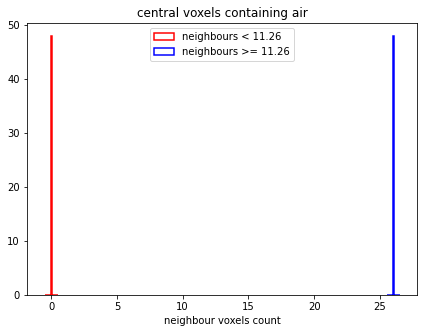

In [26]:
plt.figure(figsize=(7,5))
plot_kwds = {'density': False, 'linewidth':"1.5", 'histtype': u'step', "bins":20}
plt.hist(stats_air_bt.values(), label='neighbours < 11.26', edgecolor='red', **plot_kwds)
plt.hist(stats_air_air.values(), label='neighbours >= 11.26', edgecolor='blue', **plot_kwds)
plt.title("central voxels containing air")
plt.xlabel('neighbour voxels count')
plt.legend(loc='upper center')

#plt.savefig("neighbour_voxels_ct.png") 
plt.show()

In [27]:
stats_bt_air, stats_bt_bt = stats_count(big_bubble, centre='below')

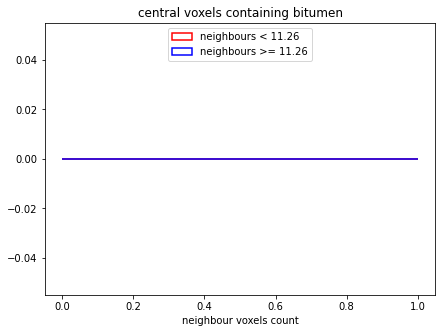

In [28]:
plt.figure(figsize=(7,5))
plot_kwds = {'density': False, 'linewidth':"1.5", 'histtype': u'step', "bins":20}
plt.hist(stats_bt_bt.values(), label='neighbours < 11.26', edgecolor='red', **plot_kwds)
plt.hist(stats_bt_air.values(), label='neighbours >= 11.26', edgecolor='blue', **plot_kwds)
plt.title("central voxels containing bitumen")
plt.xlabel('neighbour voxels count')
plt.legend(loc='upper center')

#plt.savefig("neighbour_voxels_ct.png") 
plt.show()

In [29]:
sel_x = np.where(np.logical_and(bins_x>=-100, bins_x<=100))[0][:-1]
sel_y = np.where(np.logical_and(bins_y>=-100, bins_y<=100))[0][:-1]
sel_z = np.where(np.logical_and(bins_z>=-100, bins_z<=100))[0][:-1]
sel_hist = np.meshgrid(sel_x,sel_y,sel_z)

bubble_histogram = np.copy(histogram[tuple(sel_hist)])
shape_x, shape_y, shape_z = bubble_histogram.shape

stats_air_air, stats_air_bt = stats_count(bubble_histogram)

stats_bt_air, stats_bt_bt = stats_count(bubble_histogram, centre='below')


NameError: name 'histogram' is not defined

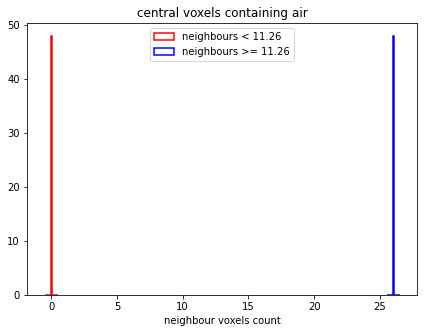

In [30]:
plt.figure(figsize=(7,5))
plot_kwds = {'density': False, 'linewidth':"1.5", 'histtype': u'step', "bins":10}
plt.hist(stats_air_bt.values(), label='neighbours < 11.26', edgecolor='red', **plot_kwds)
plt.hist(stats_air_air.values(), label='neighbours >= 11.26', edgecolor='blue', **plot_kwds)
plt.title("central voxels containing air")
plt.xlabel('neighbour voxels count')
plt.legend(loc='upper center')

#plt.savefig("neighbour_voxels_ct.png") 
plt.show()

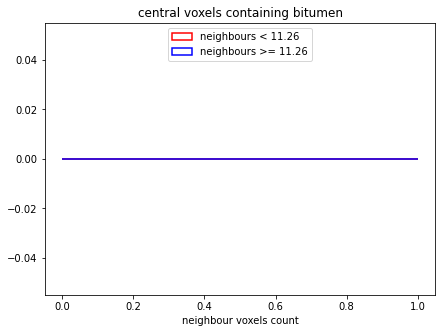

In [31]:
plt.figure(figsize=(7,5))
plot_kwds = {'density': False, 'linewidth':"1.5", 'histtype': u'step', "bins":10}
plt.hist(stats_bt_bt.values(), label='neighbours < 11.26', edgecolor='red', **plot_kwds)
plt.hist(stats_bt_air.values(), label='neighbours >= 11.26', edgecolor='blue', **plot_kwds)
plt.title("central voxels containing bitumen")
plt.xlabel('neighbour voxels count')
plt.legend(loc='upper center')

#plt.savefig("neighbour_voxels_ct.png") 
plt.show()